In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from mpl_toolkits.mplot3d import Axes3D

In [2]:
train = pd.read_csv("./input/Train/train.csv")
test = pd.read_csv("./input/Test/test.csv")

print("shape of train: ", train.shape, "shape of test: ", test.shape)

shape of train:  (7767, 563) shape of test:  (3162, 563)


In [3]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


Observation: Train data and test data is divided in approximately 70:30. There are no missing values.

### Visualizations for Train data

In [ ]:
print(train.Activity.value_counts())

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x=train.Activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in Train Set')
plt.show()

In [ ]:
# Stacked Bar Chart for different activities with regards to subjects

stack_group = train.groupby(['subject', 'Activity']).size().unstack()
stack_group.plot(kind='bar', stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in train')
plt.show()

### Visualizations for Test data

In [ ]:
print(test.Activity.value_counts())

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x=test.Activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in test')
plt.show()

In [ ]:
# Stacked Bar Chart for different activities with regards to subjects

stack_group = test.groupby(['subject', 'Activity']).size().unstack()
stack_group.plot(kind='bar', stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in test')
plt.show()

### Principal Component Analysis (PCA)
We want to use PCA to reduce the the multidimension features in our data into fewer dimensions to better understand the data distribution. We are interested to find out whether the classes are separable using these selected principal components.

In [ ]:
# First, we need to standardize the data to get better performance
from sklearn.preprocessing import StandardScaler
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#### 2 Components PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PC = pca.fit_transform(x)
principalDf = pd.DataFrame(data = PC
             , columns = ['PC1', 'PC2'])

In [ ]:
finalDf = pd.concat([principalDf, train[['Activity']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA with 2 components', fontsize = 20)
targets = train['Activity'].unique()

for target in targets:
    indicesToKeep = finalDf['Activity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

From the result above we can see that the first principal component contains 48.15% of the variance and the second principal component contains 8.08% of the variance. Together, the two components contain 56.23% of the information, which is not very representative. The classes are also overlapping.

#### 3 Components PCA

In [ ]:
pca3 = PCA(n_components=3)
PC3 = pca3.fit_transform(x)
principalDf3 = pd.DataFrame(data = PC3
             , columns = ['PC1', 'PC2', 'PC3'])

In [ ]:
finalDf3 = pd.concat([principalDf3, train[['Activity']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('PCA with 3 components', fontsize = 20)
targets = train['Activity'].unique()

for target in targets:
    indicesToKeep = finalDf3['Activity'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'PC1']
               , finalDf3.loc[indicesToKeep, 'PC2']
               , finalDf3.loc[indicesToKeep, 'PC3']
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca3.explained_variance_ratio_

From the variance ratio above we can see that the first principal component contains 48.15% of the variance and the second principal component contains 8.08% of the variance, and the third principal component contains 3.19% of the variance. Together, the three components contain 59.42% of the information, which is still considerably small. The classes are again overlapping.

## Dimensionality Reduction using Isomap Embedding

In [ ]:
# First, we need to standardize the data to get better performance
from sklearn.preprocessing import StandardScaler
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.manifold import Isomap as ISO

iso = ISO(n_components = 2)
isomap = iso.fit_transform(x)
isomapTempDf = pd.DataFrame(data = isomap, columns = ["ISO1", "ISO2"])

In [ ]:
isomapFinalDf = pd.concat([isomapTempDf, train[['Activity']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('ISO1', fontsize = 15)
ax.set_ylabel('ISO2', fontsize = 15)
ax.set_title('Isomap Embedding', fontsize = 20)
targets = train['Activity'].unique()

for target in targets:
    indicesToKeep = isomapFinalDf['Activity'] == target
    ax.scatter(isomapFinalDf.loc[indicesToKeep, 'ISO1']
               , isomapFinalDf.loc[indicesToKeep, 'ISO2']
               , s = 30
               , alpha = 0.5)
ax.legend(targets)
ax.grid()

### t-Distributed Stochastic Neighbour Embedding (t-SNE)

In [ ]:
# First, we need to standardize the data to get better performance
from sklearn.preprocessing import StandardScaler
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 7000)
tsne_results = tsne.fit_transform(x)

df_subset = pd.DataFrame(columns = ['tsne-2d-one','tsne-2d-two','Activities'])
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]
df_subset['Activities'] = y

In [ ]:
plt.figure(figsize = (16, 10))
plt.title('t-SNE with 2 Components')

sns.scatterplot(
    x = "tsne-2d-one", y = "tsne-2d-two",
    hue = "Activities",
    palette = "bright",
    data = df_subset,
    legend = "full",
    alpha = 0.3
)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1300)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

In [ ]:
dt.score(x_test, y_test)

In [ ]:
dt.score(x_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_RF_n = [RandomForestClassifier(n_estimators = 50, random_state  = 1300),
            RandomForestClassifier(n_estimators = 150, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, random_state  = 1300),
            RandomForestClassifier(n_estimators = 400, random_state  = 1300),
            RandomForestClassifier(n_estimators = 500, random_state  = 1300)]

In [ ]:
from sklearn.metrics import accuracy_score

acc_RF_n = []

for clf in clf_RF_n:
    fit = clf.fit(x_train, np.ravel(y_train))
    pred = fit.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    acc_RF_n.append(accuracy)

In [ ]:
acc_RF_n

# Factor Analysis

We want to use Factor Analysis to find latent variables which can help us have a clearer interpretation of the variables and model.

In [4]:
# Loading the data and preprocessing the data
# Dropping columns that are unnecessary or are non float.
fa_train = train.copy()
fa_train = fa_train.sort_values("Activity")
fa_train.drop(['subject', 'Activity'], axis = 1, inplace = True)
result = fa_train.columns

In [5]:
fa_train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
5873,0.035418,-0.003496,-0.019197,-0.992451,-0.996592,-0.993081,-0.992709,-0.996058,-0.993313,-0.799618,...,0.384303,-0.447457,-0.791666,0.003780,0.010927,-0.522986,0.542506,0.701667,-0.502293,-0.486076
3535,0.033435,0.013202,-0.026554,-0.992647,-0.955888,-0.979973,-0.992478,-0.952421,-0.981111,-0.799591,...,0.250039,-0.123744,-0.421313,-0.083411,0.042263,-0.056860,-0.118834,0.406107,-0.329966,-0.648314
3534,0.036000,0.022551,-0.035468,-0.992514,-0.971674,-0.988887,-0.992230,-0.971522,-0.989609,-0.800324,...,0.357742,-0.558631,-0.793670,-0.011265,-0.332927,0.113540,-0.144261,0.403848,-0.317029,-0.660747
3533,0.039373,-0.002382,-0.023495,-0.996246,-0.967241,-0.981788,-0.996713,-0.966373,-0.984032,-0.800324,...,0.543957,-0.139069,-0.370258,0.533790,-0.051320,0.071092,0.112552,0.404054,-0.314696,-0.663149
3532,0.041752,-0.023003,-0.006169,-0.993298,-0.987312,-0.988642,-0.993585,-0.987625,-0.989264,-0.793177,...,0.341884,-0.325342,-0.635577,0.021184,0.023187,-0.323193,0.215663,0.405600,-0.324542,-0.653650


In [6]:
# Scale the data accordingly
scaler = StandardScaler()

scaled_fa = fa_train.copy()
scaled_fa = pd.DataFrame(scaler.fit_transform(scaled_fa), columns = scaled_fa.columns)

In [7]:
scaled_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Columns: 561 entries, tBodyAcc-Mean-1                 to tZAxisAcc-AngleWRTGravity-1    
dtypes: float64(561)
memory usage: 33.2 MB


In [8]:
scaled_fa.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,-0.032757,-0.028506,-0.011595,-0.891227,-0.985398,-0.938409,-0.882169,-0.971813,-0.928679,-0.880198,...,0.937856,-0.417068,-0.550414,-0.039220,-0.017009,-0.885317,1.147747,2.332084,-1.836828,-1.568513
1,-0.052199,0.138530,-0.093408,-0.891671,-0.874649,-0.897652,-0.881617,-0.846412,-0.883914,-0.880144,...,0.372070,0.614263,0.673647,-0.302396,0.053646,-0.109951,-0.238166,1.751695,-1.264019,-2.155951
2,-0.027051,0.232056,-0.192543,-0.891370,-0.917600,-0.925368,-0.881022,-0.901303,-0.915090,-0.881612,...,0.825930,-0.771261,-0.557035,-0.084631,-0.792310,0.173496,-0.291451,1.747260,-1.221019,-2.200972
3,0.006019,-0.017364,-0.059391,-0.899823,-0.905540,-0.903295,-0.891744,-0.886507,-0.894630,-0.881612,...,1.610641,0.565437,0.842390,1.560544,-0.157359,0.102888,0.246730,1.747665,-1.213264,-2.209667
4,0.029351,-0.223633,0.133289,-0.893146,-0.960148,-0.924606,-0.884264,-0.947580,-0.913823,-0.867297,...,0.759107,-0.028016,-0.034520,0.013310,0.010634,-0.552976,0.462810,1.750700,-1.245993,-2.175275


In [9]:
# Check Adequacy using Bartlett, and the p-value should be 0
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_fa)
print(chi_square_value, p_value) # = 0

inf nan


C:\Users\Yc\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Yc\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1272: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


In [10]:
#A KMO value under 0.6 means that the data is inappropirate for FA
kmo_all,kmo_model=calculate_kmo(scaled_fa)
print(kmo_model) # = 0.977 > 0.6

C:\Users\Yc\anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.9773428026823247


First run a Factor analysis without any rotation, and setting N = 10, to determine the number of factors to be used in a solution.

In [11]:
# Initial Factor Analysis to determine nbumber of factors
fa = FactorAnalyzer(10, rotation=None)
fa.fit(scaled_fa)


FactorAnalyzer(rotation=None, rotation_kwargs={})

In [12]:
#Checks the eigen values of the intial analyzer
ev, v = fa.get_eigenvalues()

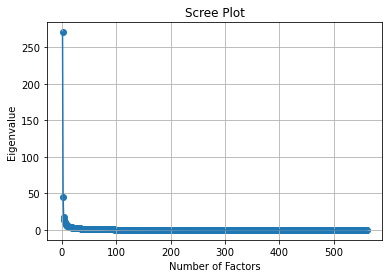

In [13]:
#Analysing and plotting the Scree plot
plt.scatter(range(1,scaled_fa.shape[1]+1),ev)
plt.plot(range(1,scaled_fa.shape[1]+1), ev)
plt.title("Scree Plot")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

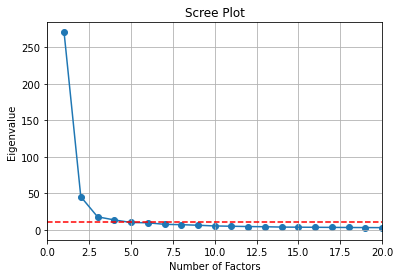

In [28]:
#Zooming in on the Scree plot
plt.scatter(range(1,scaled_fa.shape[1]+1),ev)
plt.plot(range(1,scaled_fa.shape[1]+1), ev)
plt.title("Scree Plot")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.xlim(0, 20)
plt.grid()
plt.axhline(y = 11, color = 'r', linestyle = '--')
plt.show()

From the Scree plot above, we can see that the "elbow" of the graph is around ev = 11 and the number of factors is around 4-5. So factors to the left of the scree plot when y = 12 should be kept and seen as significant while those on the right are deemed as in significant.

In [27]:
#Filter out eigenvalues that are above 11
ev_greater_than1 = ev.copy()
ev_greater_than1 = ev_greater_than1[np.where(ev_greater_than1 > 11)]

#Number of eigenvalue > 11
no_ev_gt1 = len(ev_greater_than1) # = 4

In [29]:
# New FA with Varimax Rotation, using minres
fa1 = FactorAnalyzer(4, rotation="varimax", method='minres', use_smc=True)
fa1.fit(scaled_fa)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [31]:
#Showing the Weights of each variable as a factor to see which features can be considered, sorted in descending order
pd.DataFrame(fa1.loadings_, columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index = [fa_train.columns]).sort_values(by = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], ascending = False)

,Factor 1,Factor 2,Factor 3,Factor 4
tBodyAccJerk-STD-1,0.955349,0.029652,0.083073,0.217267
tBodyAccJerk-Mad-1,0.955236,0.026521,0.080242,0.216464
fBodyAccJerk-Mean-1,0.955213,0.032790,0.088492,0.207901
tBodyAccJerkMag-Mean-1,0.953485,0.042498,0.144872,0.232404
tBodyAccJerkMag-SMA-1,0.953485,0.042498,0.144872,0.232404
...,...,...,...,...
tBodyAcc-Min-2,-0.880259,-0.230537,-0.079229,-0.182246
tBodyGyroJerk-Min-1,-0.885121,-0.042316,-0.090337,-0.207431
tBodyAcc-Min-1,-0.896222,-0.227784,-0.073784,-0.151554
tBodyAccJerk-Min-1,-0.901442,-0.058534,-0.091220,-0.259017


In [39]:
pd.DataFrame(fa1.loadings_, columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index = [fa_train.columns]).sort_values(by = ['Factor 2'], ascending = False)

,Factor 1,Factor 2,Factor 3,Factor 4
tGravityAcc-ARCoeff-10,-0.215451,0.713598,-0.049375,0.095885
tBodyAccMag-ARCoeff-2,0.311729,0.699596,-0.083210,0.157639
tGravityAccMag-ARCoeff-2,0.311729,0.699596,-0.083210,0.157639
tGravityAcc-ARCoeff-12,-0.108358,0.699427,-0.006932,0.136217
tGravityAcc-ARCoeff-6,-0.246969,0.651552,0.004359,0.007547
...,...,...,...,...
tGravityAcc-ARCoeff-11,0.163534,-0.710466,0.028762,-0.116578
tBodyAccMag-ARCoeff-1,-0.295502,-0.736635,0.113920,-0.179186
tGravityAccMag-ARCoeff-1,-0.295502,-0.736635,0.113920,-0.179186
fBodyAcc-MeanFreq-3,0.008985,-0.736815,0.050621,-0.275014


From the loadings, 

Factor 1: tBodyAccJerk-STD-1, tBodyAccJerk-Mad-1, fBodyAccJerk-Mean-1, tBodyAccJerkMag-Mean-1, tBodyAccJerkMag-SMA-1

Factor 2: tGravityAcc-ARCoeff-10

Factor 3: tBodyGyroJerk-Energy-2

Factor 4: tGravityAcc-Min-1

As Factor 1 has several factors which similar loadings.

In [42]:
#Communality of Loading, where values closer to 1 means that that factor explain more of the variance
pd.DataFrame(fa1.get_communalities(), columns = ["Communalities"], index = [fa_train.columns]).sort_values(by = "Communalities", ascending = False)

,Communalities
fBodyAccJerk-SMA-1,0.986456
tBodyAccJerkMag-Mean-1,0.985940
tBodyAccJerkMag-SMA-1,0.985940
tBodyAccJerk-SMA-1,0.985750
fBodyAcc-SMA-1,0.983543
...,...
tBodyAccJerk-Mean-3,0.003149
tBodyGyroJerk-AngleWRTGravity-1,0.003089
tBodyGyroJerk-Mean-2,0.001114
tBodyAccJerk-Mean-1,0.001005


In [45]:
# Showing the Sum of Squared Loading (Variance), Proportional Variance, and Cumulative Variance caused by the 4 factors.
pd.DataFrame(fa1.get_factor_variance(), columns = ["Factor 1", "Factor 2", "Factor 3", "Factor 4"], index = ["Sum Square Loading", "Proportional Variance", "Cumulative Variance"])

,Factor 1,Factor 2,Factor 3,Factor 4
Sum Square Loading,237.556777,52.591384,30.002466,26.131129
Proportional Variance,0.423452,0.093746,0.053480,0.046580
Cumulative Variance,0.423452,0.517198,0.570678,0.617258


From the table above, it can be seen that using the four factors,  can explain around 62% of the variance, which is considered valid but maybe still small (Recommended is > 60% and this is very close to it).

However Factor 1 have several with similar loading, so we may need to consider other methods to reduce the dimensionality of the data!